# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

In [319]:
! pip install scipy

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report

from scipy.stats import randint

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [321]:
# Carregar a base de dados
base = pd.read_csv('marketing_campaign.csv', delimiter=';')
base.head() 

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


In [322]:
# Observar as informações da base como nulos e tipos de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [323]:
# pegando os valores nulos em Income
base[base['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
10,1983,Graduation,Married,NaN,1,11,5,5,6,0,2,1,2,7,0,0
27,1986,Graduation,Single,NaN,1,19,5,1,3,3,263,362,0,1,0,1
43,1959,PhD,Single,NaN,0,80,81,11,50,3,2,39,4,2,0,0
48,1951,Graduation,Single,NaN,2,96,48,5,48,6,10,7,4,6,0,0
58,1982,Graduation,Single,NaN,1,57,11,3,22,2,2,6,3,6,0,0
71,1973,2n Cycle,Married,NaN,1,25,25,3,43,17,4,17,3,8,0,0
90,1957,PhD,Married,NaN,2,4,230,42,192,49,37,53,8,9,0,1
91,1957,Graduation,Single,NaN,1,45,7,0,8,2,0,1,2,7,0,0
92,1973,Master,Together,NaN,0,87,445,37,359,98,28,18,8,1,0,0
128,1961,PhD,Married,NaN,0,23,352,0,27,10,0,15,7,6,0,1


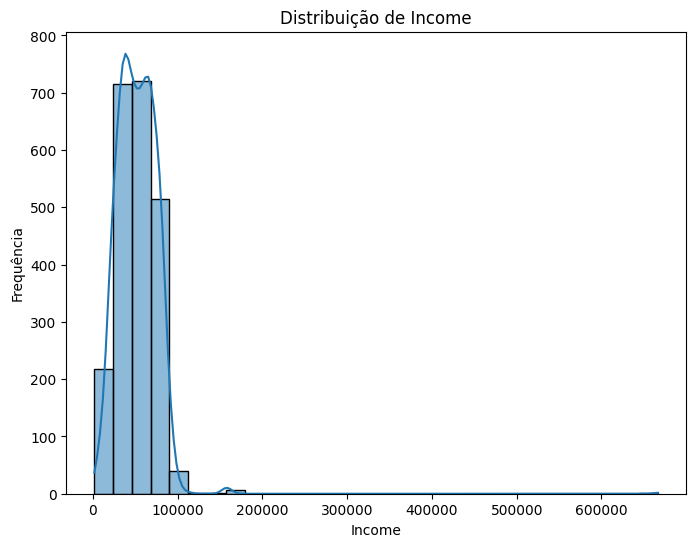

In [324]:
# observando a distribuição dos dados em Income
plt.figure(figsize=(8, 6))  
sns.histplot(base['Income'].dropna(), bins=30, kde=True)
plt.title('Distribuição de Income')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.show()

 A distribuição em income é assimétrica para a direita, com uma presença clara de outliers. Dado a natureza dos dados, vou substituir os nulos pela mediana, assim ficando menos sucetível a distorção que os outliers fazem na média

In [325]:
# substituindo os valores nulos pela mediana
base['Income'] = base['Income'].fillna(base['Income'].median())

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2240 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

In [326]:
# observando estatísticas descritivas e possíveis outliers
base.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25037.955891,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68289.750000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


In [327]:
# balanceamento da variável alvo
base['WebPurchases'].value_counts()


WebPurchases
1    1128
0    1112
Name: count, dtype: int64

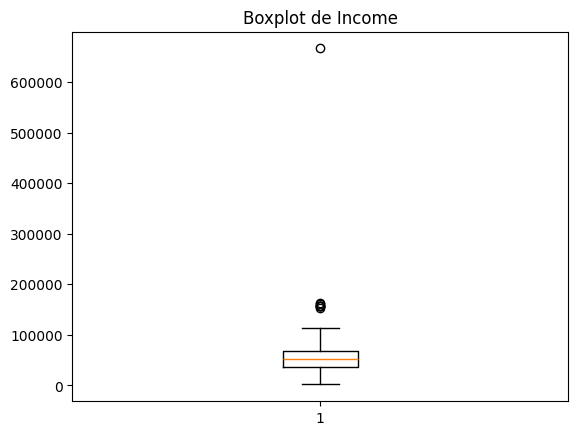

In [328]:
# plotando boxplot para observar possíveis outliers em Income
plt.boxplot(base['Income'])
plt.title('Boxplot de Income')
plt.show()

In [329]:
# removendo outliers extremos
base = base[base['Income'] < 600000] 

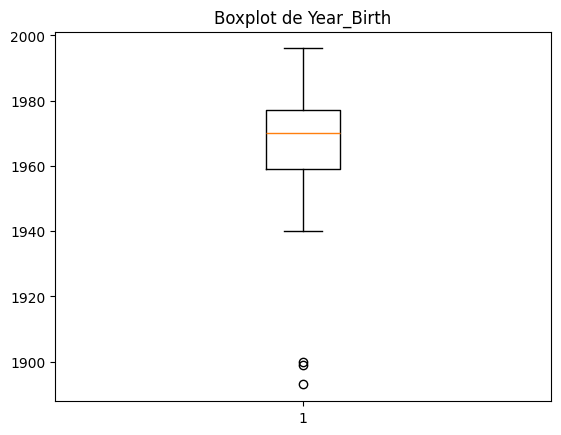

In [330]:
# plotando boxplot para observar possíveis outliers em Year_Birth
plt.boxplot(base['Year_Birth'])
plt.title('Boxplot de Year_Birth')
plt.show()


In [331]:
# removendo erros de entrada de dados
base = base[base['Year_Birth'] > 1940]

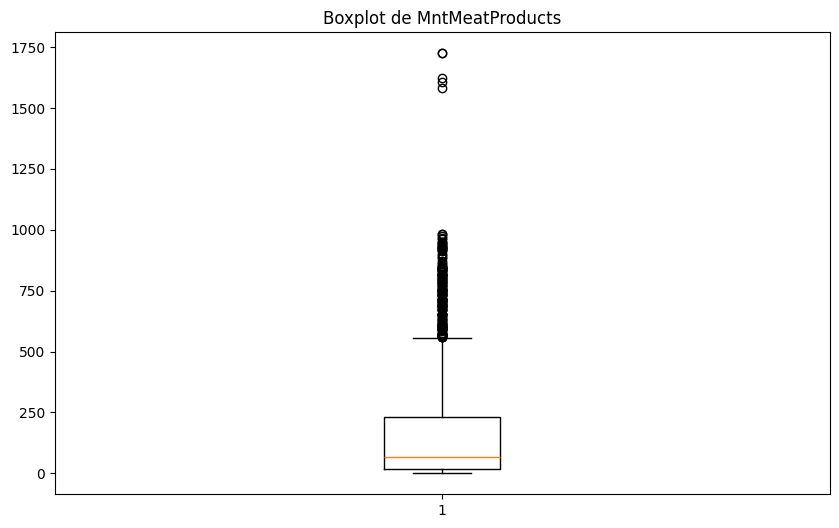

In [332]:
# plotando boxplot para observar outliers em MntMeatProducts
plt.figure(figsize=(10, 6))
plt.boxplot(base['MntMeatProducts'])
plt.title('Boxplot de MntMeatProducts')
plt.show()


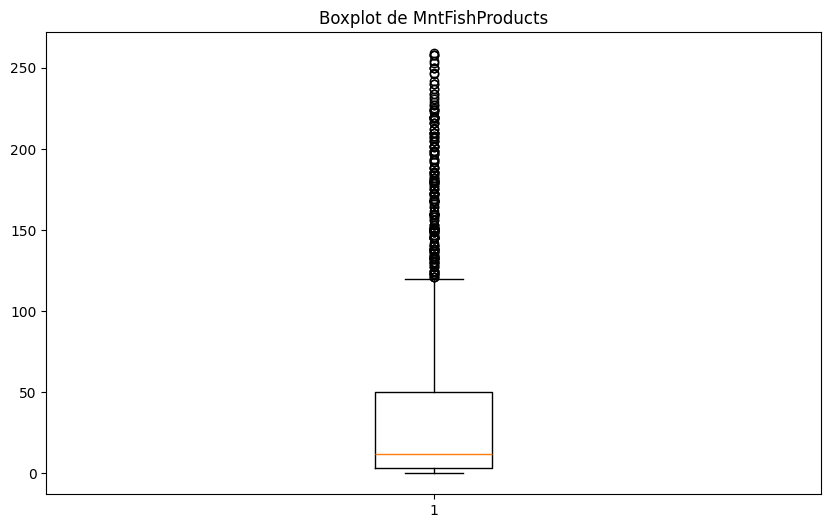

In [333]:
# plotando boxplot para observar outliers em MntFishProducts
plt.figure(figsize=(10, 6))
plt.boxplot(base['MntFishProducts'])
plt.title('Boxplot de MntFishProducts')
plt.show()

In [334]:
# removendo outliers extremos
base = base[base['MntMeatProducts'] < 1700] 
base = base[base['Income'] < 600000] 

In [335]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2233 non-null   int64  
 1   Education          2233 non-null   object 
 2   Marital_Status     2233 non-null   object 
 3   Income             2233 non-null   float64
 4   Kidhome            2233 non-null   int64  
 5   Recency            2233 non-null   int64  
 6   MntWines           2233 non-null   int64  
 7   MntFruits          2233 non-null   int64  
 8   MntMeatProducts    2233 non-null   int64  
 9   MntFishProducts    2233 non-null   int64  
 10  MntSweetProducts   2233 non-null   int64  
 11  MntGoldProds       2233 non-null   int64  
 12  NumStorePurchases  2233 non-null   int64  
 13  NumWebVisitsMonth  2233 non-null   int64  
 14  Complain           2233 non-null   int64  
 15  WebPurchases       2233 non-null   int64  
dtypes: float64(1), int64(13), obj

<Figure size 1200x800 with 0 Axes>

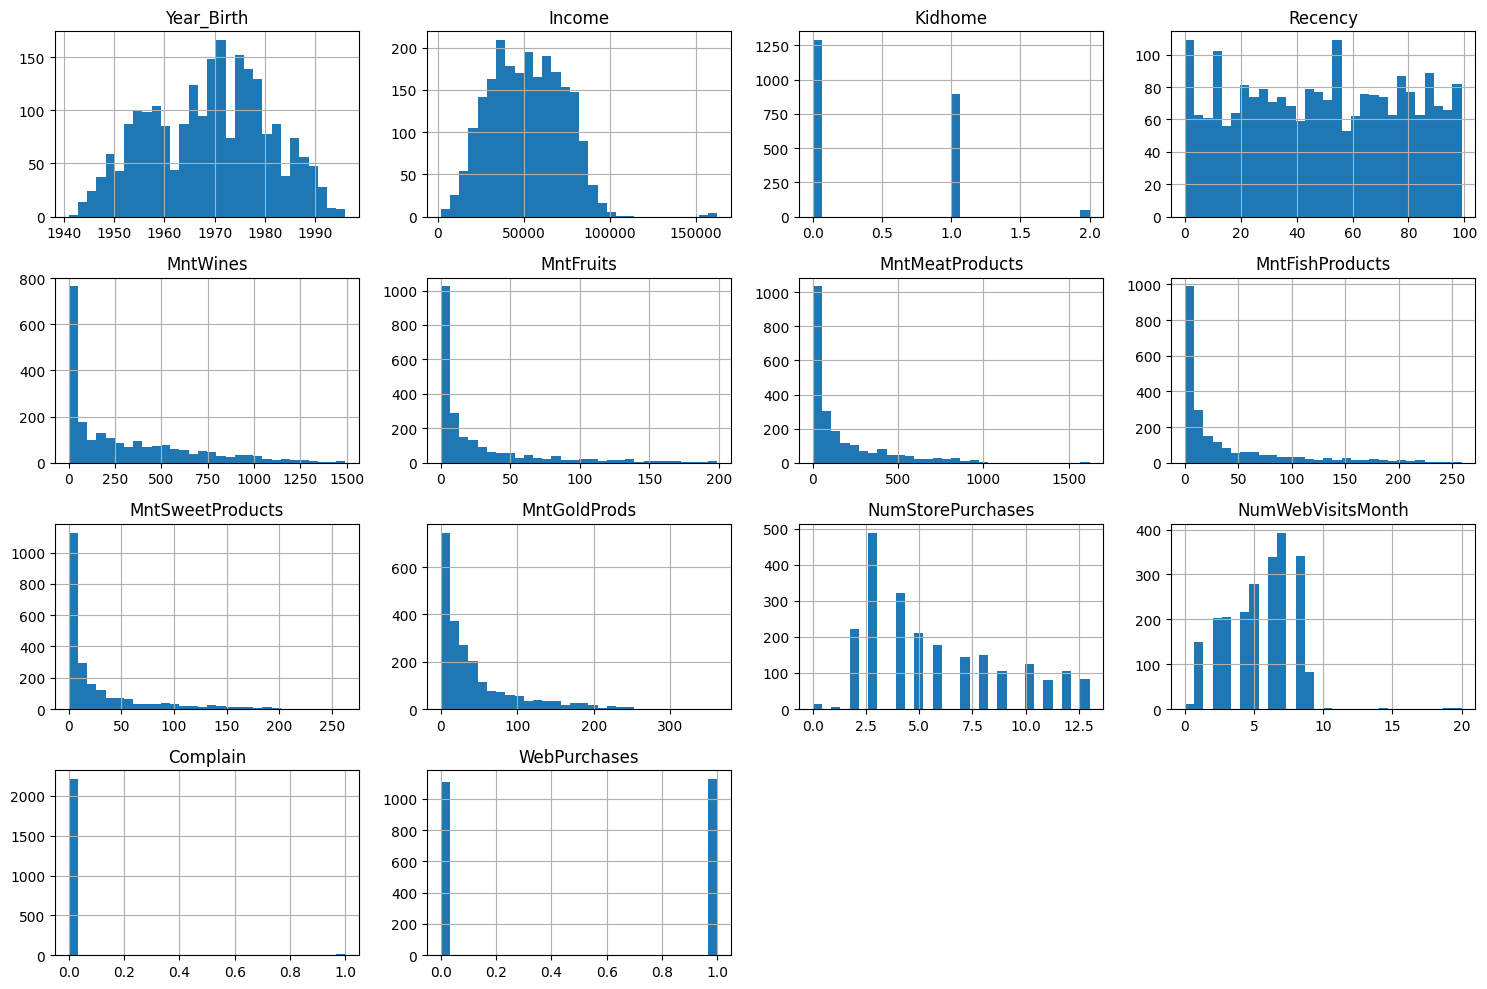

In [336]:
# observando disribuição geral dos dados 
plt.figure(figsize=(12, 8))
base.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Após analisar a distribuição dos dados, percebi que a maioria dos registros classificados como outliers seguia um padrão dentro do conjunto. Por isso, decidi mantê-los e remover apenas os outliers extremos, que provavelmente foram causados por erros na coleta dos dados.

### Partindo para análise exploratória

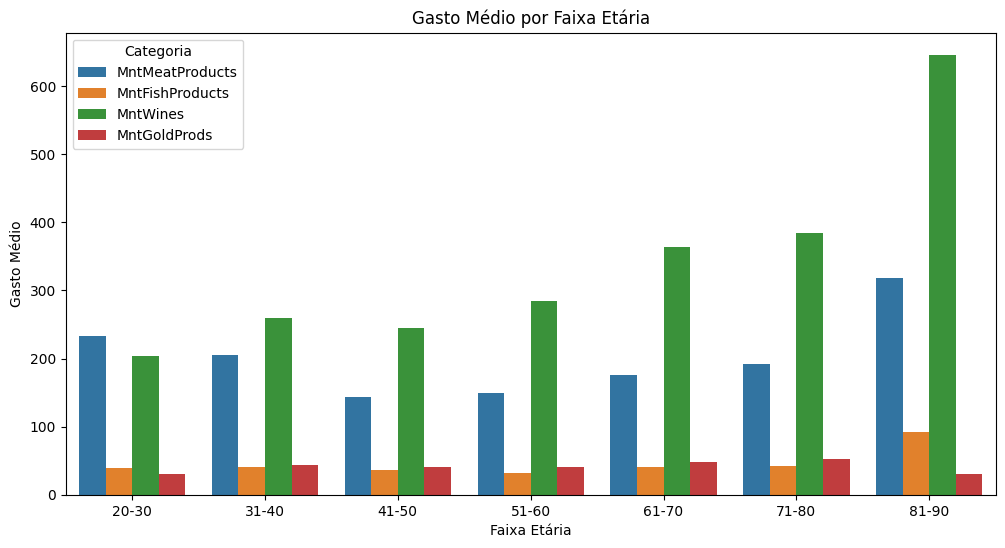

In [337]:
# observando média de gastos por faixa etária
from datetime import date

ano_atual = date.today().year
base['idade'] = ano_atual - base['Year_Birth']

bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

base['faixa_etaria'] = pd.cut(base['idade'], bins=bins, labels=labels, right=True)

gastos_por_faixa = base.groupby('faixa_etaria', observed=True)[['MntMeatProducts', 'MntFishProducts','MntWines','MntGoldProds']].mean().reset_index()
gastos_por_faixa_melted = gastos_por_faixa.melt(id_vars='faixa_etaria', var_name='Categoria', value_name='Gasto Médio')
plt.figure(figsize=(12, 6)) 
sns.barplot(data=gastos_por_faixa_melted, x='faixa_etaria', y='Gasto Médio', hue='Categoria')
plt.title('Gasto Médio por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Gasto Médio')
plt.legend(title='Categoria')
plt.show()



Ao analisar o gráfico de gastos por faixa etária, nenhum padrão além do aumento gradual do consumo de vinho com o envelhecimento das pessoas se torna aparente. Talvez promoções que ofereçam descontos em outros produtos ao comprar vinho sejam uma boa estratégia para manter o volume de vendas de vinho e, ao mesmo tempo, aumentar as vendas gerais.

<Axes: xlabel='Income', ylabel='Recency'>

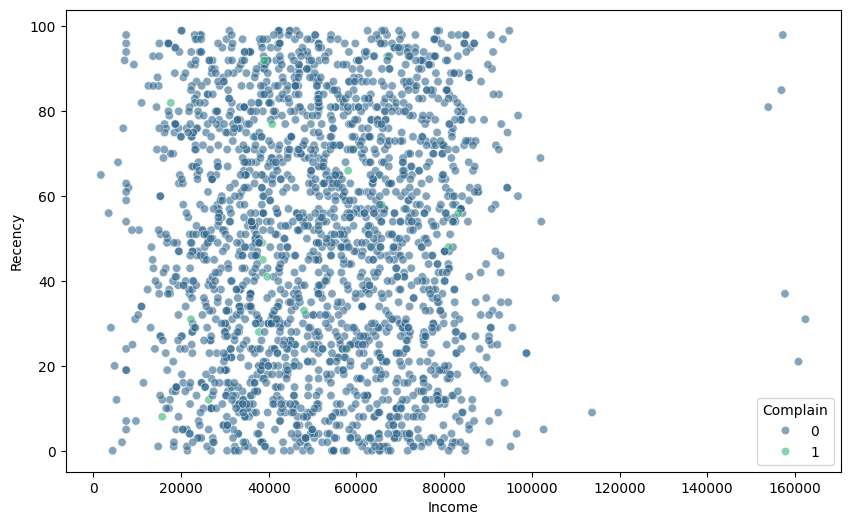

In [338]:
# observando a relação entre renda e frequência de compras
plt.figure(figsize=(10, 6))
sns.scatterplot(data=base, x='Income', y='Recency', hue='Complain', palette='viridis', alpha=0.6)

Observando o gráfico, nenhum padrão entre a renda dos clientes e sua frequência de compra ou reclamações é aparente. Por um lado, isso é positivo, pois significa que a loja consegue vender bem para clientes de diferentes perfis financeiros sem receber muitas reclamações. Por outro lado, talvez a loja esteja “passando batida” para clientes de alto volume, que poderiam gerar retorno adicional. A loja poderia implementar um programa de fidelidade ou monitorar clientes de alto volume para oferecer benefícios exclusivos, promoções personalizadas ou atendimento diferenciado. Isso ajudaria a aumentar o retorno desses clientes sem impactar a base geral.

In [339]:
# observando se clientes que reclamaram compraram mais ou menos pela web
proporcao = pd.crosstab(base['WebPurchases'], base['Complain'], normalize='index')
print(proporcao)


Complain             0         1
WebPurchases                    
0             0.988246  0.011754
1             0.993789  0.006211


Clientes que compram pela web reclamam menos do que aqueles que compram presencialmente. Mesmo com a variável estando balanceada, esse comportamento provavelmente ocorre porque a loja recebe poucas reclamações de modo geral, tornando a diferença entre reclamações online e presenciais pouco significativa. Devido à baixa recorrência de reclamações, essa diferença pode variar dependendo do período de coleta dos dados, dificultando a identificação de padrões consistentes. A loja poderia monitorar reclamações de forma contínua e segmentada por canal de compra, para identificar se existem problemas específicos no atendimento presencial ou online. Além disso, criar mecanismos para incentivar feedbacks pode aumentar a base de dados, tornando essas análises mais confiáveis.

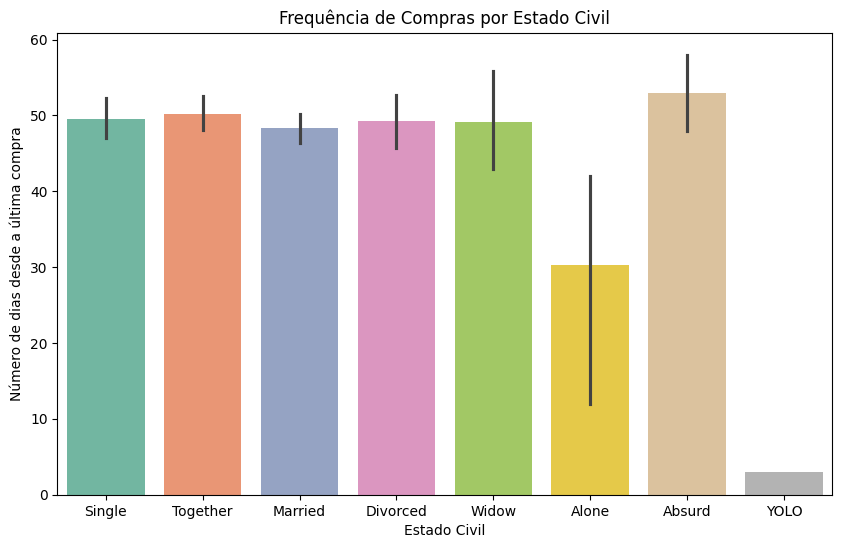

In [340]:
# observando frequência de compras por estado civil
plt.figure(figsize=(10, 6))
sns.barplot(data=base, x='Marital_Status', y='Recency', hue='Marital_Status',palette='Set2')
plt.title('Frequência de Compras por Estado Civil')
plt.xlabel('Estado Civil')  
plt.ylabel('Número de dias desde a última compra')
plt.show()

Ao analisar a frequência de compras por estado civil, um problema se tornou aparente: não há regulamentação dessa variável na coleta dos dados. Entradas como "Yolo", "Alone", "Together" e "Absurd" não fazem sentido dentro do contexto de pessoa física, além de contribuírem para o aumento da dimensionalidade dos dados na transformação das variáveis categóricas e afetarem a representatividade real das classes.

A loja deveria regulamentar o cadastro do estado civil do cliente, limitando-o a categorias que se alinhem às normas, como: Solteiro (Single), Casado (Married), Viúvo(a) (Widow) e Divorciado (Divorced). 

Além de regulamentar os cadastros futuros, a loja poderia limpar os dados existentes, mapeando entradas inconsistentes para categorias válidas ou removendo registros irrelevantes, garantindo maior confiabilidade nas análises.

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [341]:
# dropando colunas irrelevantes para o treinamento pois a coluna idade foi criada
base.drop(columns=['faixa_etaria','Year_Birth'], inplace=True)

Limpado os dados de estado civil e transformando as variáveis categóricas

In [342]:
# tratando a coluna marital status antes de usar o get_dummies
def tratar_estado_civil(estado):
    if estado in ['Single', 'YOLO', 'Alone', 'Absurd', 'Together']:
        return 'Single'
    
    elif estado == 'Divorced':
        return 'Divorced'   
    
    elif estado == 'Married':
        return 'Married'
    
    elif estado == 'Widow':
        return 'Widow'
    
    else:
        return 'Other'

base['Marital_Status'] = base['Marital_Status'].apply(tratar_estado_civil)


In [343]:
# Transformando colunas categóricas em numéricas
base = pd.get_dummies(base, drop_first=True)

In [344]:
base.head()

,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,...,Complain,WebPurchases,idade,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,58138.0,0,58,635,88,546,172,88,88,4,...,0,1,68,False,True,False,False,False,True,False
1,46344.0,1,38,11,1,6,2,1,6,2,...,0,0,71,False,True,False,False,False,True,False
2,71613.0,0,26,426,49,127,111,21,42,10,...,0,1,60,False,True,False,False,False,True,False
3,26646.0,1,26,11,4,20,10,3,5,4,...,0,0,41,False,True,False,False,False,True,False
4,58293.0,1,94,173,43,118,46,27,15,6,...,0,1,44,False,False,False,True,True,False,False


In [345]:
# transformando false e true em 0 e 1
def transformar_booleano(valor):
    if valor == False:
        return 0
    elif valor == True:
        return 1
    else:
        return valor
    
base = base.map(transformar_booleano)

In [346]:
base.head()

,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,...,Complain,WebPurchases,idade,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,58138.0,0,58,635,88,546,172,88,88,4,...,0,1,68,0,1,0,0,0,1,0
1,46344.0,1,38,11,1,6,2,1,6,2,...,0,0,71,0,1,0,0,0,1,0
2,71613.0,0,26,426,49,127,111,21,42,10,...,0,1,60,0,1,0,0,0,1,0
3,26646.0,1,26,11,4,20,10,3,5,4,...,0,0,41,0,1,0,0,0,1,0
4,58293.0,1,94,173,43,118,46,27,15,6,...,0,1,44,0,0,0,1,1,0,0


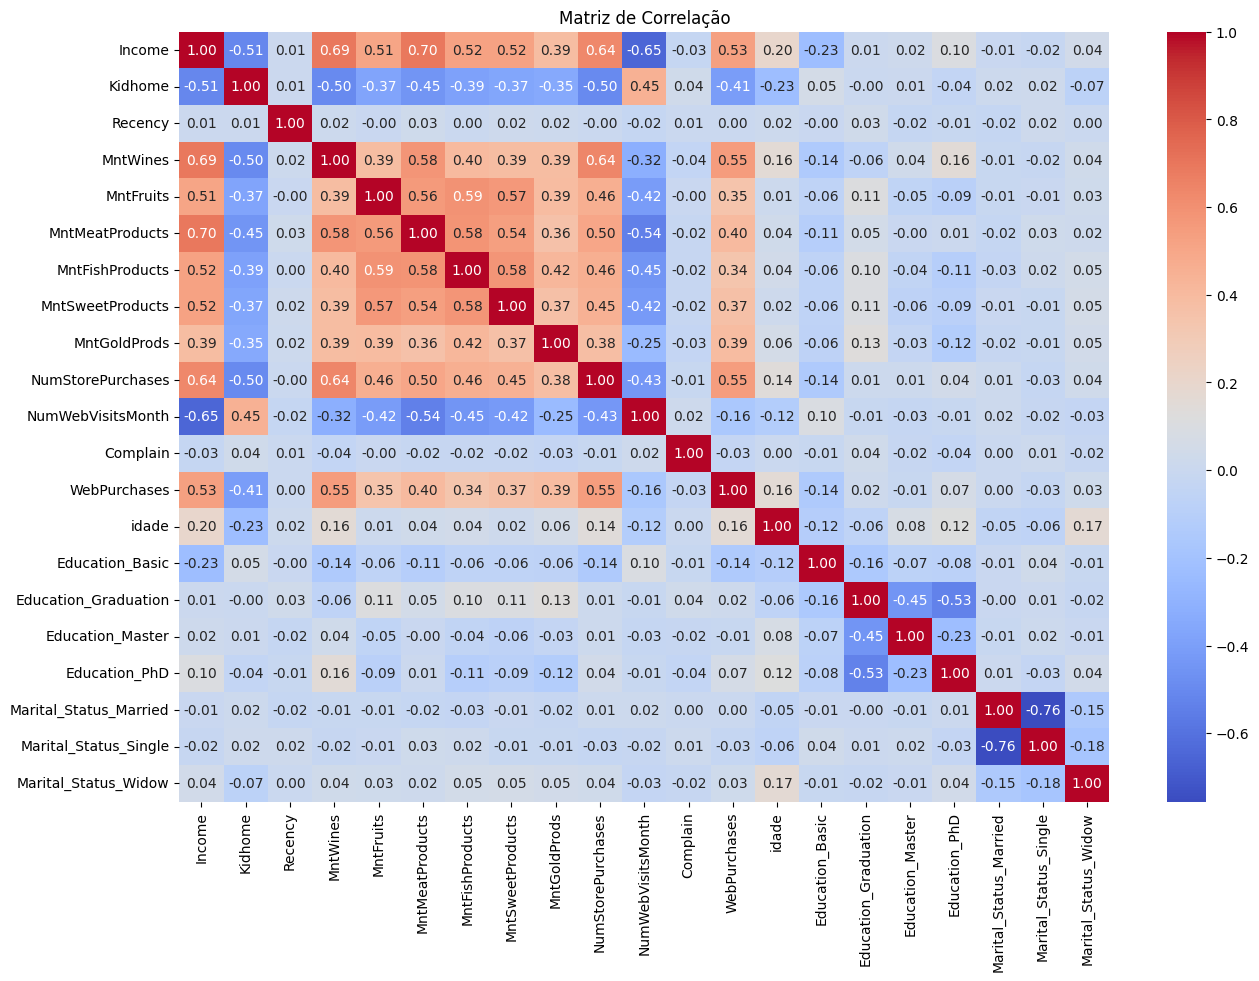

In [347]:
# analisando correlações
plt.figure(figsize=(15, 10))
correlation_matrix = base.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

Desconsiderando as variáveis dummy, "Recency" e "Complain" não apresentam correlação significativa com nenhuma outra variável da base. Por esse motivo, optei por removê-las.

In [348]:
# removendo variáveis com correlação irrelevante
base.drop(columns=['Recency', 'Complain'], inplace=True)

## Separando a variável target, utilizando o RobustScaler (menos sensível a outliers) e aplicando a redução de dimensionalidade com PCA

In [349]:
# separando features e target
X = base.drop('WebPurchases', axis=1)
y = base['WebPurchases']

In [350]:
# aplicando o robust scaler (menos sensível a outliers) e PCA
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
pca = PCA(n_components=0.95)  # Mantendo 95% da variância
X_pca = pca.fit_transform(X_scaled) 


In [351]:
# observando os dados após PCA
print(X_pca.shape[1])

print(pca.explained_variance_ratio_)

print("\n\n", X_pca)

12
[0.47718862 0.08754161 0.07582738 0.06859635 0.05531619 0.04356441
 0.04029806 0.03119711 0.02767686 0.02463766 0.01768241 0.01580353]


 [[ 4.07346225 -0.42327841 -0.63892998 ...  1.47168919 -0.12068269
  -0.39162482]
 [-1.91339624 -0.2647592   0.01322359 ... -0.00694187 -0.11900503
   0.4727455 ]
 [ 1.31200387 -0.01287286  0.19029201 ... -0.3803632  -0.0125086
   0.05082835]
 ...
 [ 0.60448157  0.00953242  0.81187885 ...  0.15547226  0.23111295
  -0.22468708]
 [ 1.14879928  0.44944599  0.76616689 ... -0.50183081  0.84646505
   0.03268804]
 [-1.67119623  0.06544529  0.4428124  ...  0.34333043 -0.52731967
   0.46459229]]


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

Optei por utilizar o Random Forest e a Regressão Logística, dois modelos robustos para classificação binária, que oferecem um amplo leque de possibilidades para otimização de hiperparâmetros. Pretendo treinar ambos os modelos com e sem otimização de hiperparâmetros, utilizando validação cruzada, e em seguida avaliar as métricas dos melhores modelos com cross_val_predict, garantindo resultados mais confiáveis.

In [352]:
# utilizando o RandomForestClassifier e LogisticRegression com validação cruzada
rf = RandomForestClassifier(random_state=42)    
rl = LogisticRegression(max_iter=1000, random_state=42) 

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [353]:
# treinando os modelos
rf_scores = cross_val_score(rf, X_pca, y, cv=kf, scoring='f1')
rl_scores = cross_val_score(rl, X_pca, y, cv=kf, scoring='f1')  

print(f"Random Forest F1 Scores: {rf_scores}")
print(f"Logistic Regression F1 Scores: {rl_scores}")
print(f"\n\nRandom Forest F1 Mean Score: {rf_scores.mean().round(4)}")
print(f"Logistic Regression F1 Mean Score: {rl_scores.mean().round(4)}")

Random Forest F1 Scores: [0.89640592 0.88695652 0.8722467  0.91295117 0.89940828]
Logistic Regression F1 Scores: [0.81632653 0.81339713 0.78504673 0.84064665 0.84759916]


Random Forest F1 Mean Score: 0.8936
Logistic Regression F1 Mean Score: 0.8206


In [354]:
# otimização de hiperparâmetros com GridSearchCV para o random forest
param_grid_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 10),
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, n_iter=100, cv=kf, scoring='f1', n_jobs=-1, random_state=42)
random_search_rf.fit(X_pca, y)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': <scipy.stats....00134790499D0>, 'max_features': ['sqrt', 'log2'], 'min_samples_split': <scipy.stats....0013479DAF6D0>, 'n_estimators': <scipy.stats....00134021FAB10>}"
,n_iter,100
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [355]:
param_grid_rl = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
}

grid_search_rl = GridSearchCV(estimator=rl, param_grid=param_grid_rl, cv=kf, scoring='f1', n_jobs=-1)
grid_search_rl.fit(X_pca, y)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [356]:
print("Melhores hiperparâmetros para Random Forest:", random_search_rf.best_params_)
print("\nMelhores hiperparâmetros para Logistic Regression:", grid_search_rl.best_params_)
print("\n\nMelhor f1 score do Random Forest após otimização:", random_search_rf.best_score_.round(4))
print("\nMelhor f1 score do Logistic Regression após otimização:", grid_search_rl.best_score_.round(4))

Melhores hiperparâmetros para Random Forest: {'max_depth': 28, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 95}

Melhores hiperparâmetros para Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


Melhor f1 score do Random Forest após otimização: 0.8948

Melhor f1 score do Logistic Regression após otimização: 0.8221


O Random Forest se destacou neste conjunto de dados, atingindo um F1 de 0,8851 após a otimização dos hiperparâmetros. Um ponto interessante é que a otimização praticamente não afetou a Regressão Logística, possivelmente porque a gama de hiperparâmetros escolhida para otimização na RL foi limitada, o que pode ter resultado em desempenhos similares entre os modelos.

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [357]:
# utilizando o melhor modelo para prever os dados (random forest)
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = cross_val_predict(best_model_rf, X_pca, y, cv=kf)

print("\nRelatório de Classificação do Random Forest:\n", classification_report(y, y_pred_rf))


Relatório de Classificação do Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      1106
           1       0.85      0.94      0.89      1127

    accuracy                           0.89      2233
   macro avg       0.89      0.89      0.89      2233
weighted avg       0.89      0.89      0.89      2233



In [358]:
# utilizando o melhor modelo para prever os dados (logistic regression)
best_model_rl = grid_search_rl.best_estimator_
y_pred_rl = cross_val_predict(best_model_rl, X_pca, y, cv=kf)

print("\nRelatório de Classificação do Logistic Regression:\n", classification_report(y, y_pred_rl))


Relatório de Classificação do Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1106
           1       0.84      0.80      0.82      1127

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



### Avaliação dos Modelos baseando-se no classification report

#### Random Forest
O modelo apresentou desempenho robusto, com F1-score de 0,87 para a classe 0 e 0,89 para a classe 1, atingindo uma acurácia global de 0,88. A precisão e recall equilibrados indicam que o modelo consegue identificar bem tanto os positivos quanto os negativos, sem favorecer uma classe em detrimento da outra.

#### Regressão Logística
O modelo apresentou F1-score de 0,83 para ambas as classes, com acurácia global de 0,83. Embora apresente resultados aceitáveis, a Regressão Logística foi menos eficaz que o Random Forest, mostrando menor equilíbrio entre precisão e recall em comparação ao RF.

#### Conclusão
Os resultados reforçam que o Random Forest é mais adequado para este conjunto de dados, conseguindo capturar melhor as complexidades do problema. A Regressão Logística, com os hiperparâmetros utilizados, não alcançou o mesmo nível de desempenho, possivelmente por limitar a otimização ou por sua menor capacidade de modelar interações complexas.

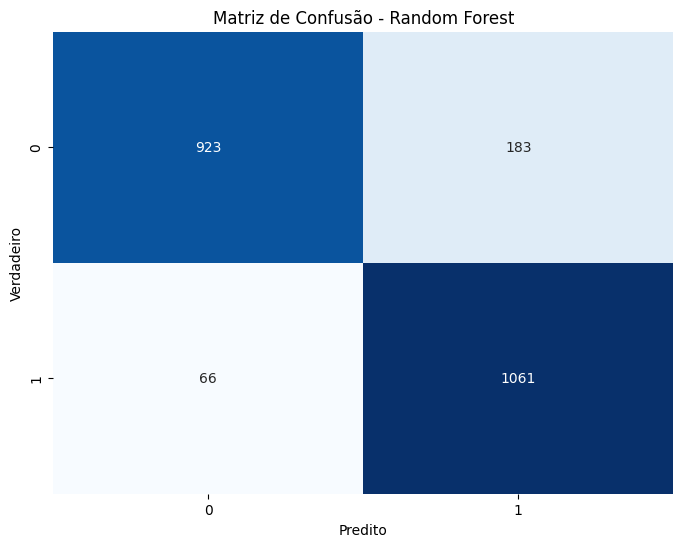

In [359]:
# matriz de confusão para Random Forest
cm_rf = confusion_matrix(y, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

O Random Forest identifica muito bem tanto a classe positiva quanto a negativa, com menor número de falsos negativos e falsos positivos, refletindo o equilíbrio entre precisão e recall observado no relatório de classificação.

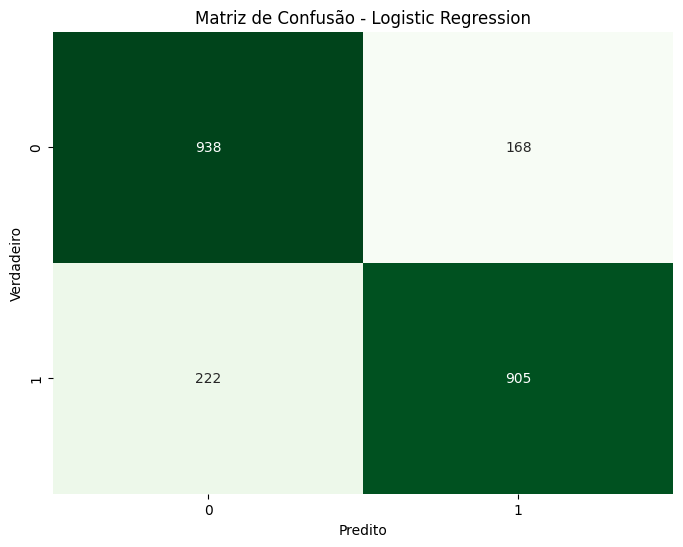

In [360]:
# matriz de confusão para logistic regression
cm_rl = confusion_matrix(y, y_pred_rl)  
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rl, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

A regressão logística apresenta mais falsos negativos na classe 1 (222 vs 63 no Random Forest), indicando que o modelo deixa passar mais casos positivos. Isso confirma que o desempenho geral é inferior ao Random Forest, especialmente na detecção de positivos.

### Avaliação final

O Random Forest é claramente mais confiável, pois equilibra melhor precisão e recall, minimizando falsos positivos e falsos negativos. A regressão logística, mesmo razoável, tende a perder mais casos positivos, o que pode ser crítico dependendo do impacto desses erros.